In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def chop_corners(img_OG):
    # create a copy
    img = img_OG.copy()
    
    img[img==255] = 0
    # get the bbox for shelf
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    result = img.copy()
    bbox_x = []
    bbox_y = []
    bbox_h = []
    bbox_w = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        print(x,y,w,h)
        bbox_x.append(x)
        bbox_y.append(y)
        bbox_w.append(w)
        bbox_h.append(h)

    # find the lowest x
    x = min(bbox_x)
    
    # find the lowest y
    y = min(bbox_y)
    
    # find the width
    # get the right most x
    for a in range(len(bbox_x)):
        bbox_x[a] += bbox_w[a]
        
    # get the maximum x
    x_max = max(bbox_x)
    
    # get the final width
    w = x_max - x
    
    # similarly get y
    for a in range(len(bbox_y)):
        bbox_y[a] += bbox_h[a]
        
    # get the maximum x
    y_max = max(bbox_y)
    
    # get the final width
    h = y_max - y
    
    rack_bbox = [x, y, w, h]
    
    # now make the region outside this region as black
    for row in range(len(img)):
        for col in range(len(img[row])):
            if(row < rack_bbox[0]+rack_bbox[2] and row > rack_bbox[0] and
               col < rack_bbox[1]+rack_bbox[3] and col > rack_bbox[1]):
                # do nothing
                pass
            else:
                # make it black
                img_OG[col, row] = 0
    
    return img_OG
    
# Read the GREY image
img = cv2.imread("/home/anurag/Research/data/debugOutputs/front000001_2.png", 0)
chop_corners(img)
cv2.imwrite("test.png", img)

426 158 10 38
116 158 288 38
88 158 9 38
75 158 6 38


True

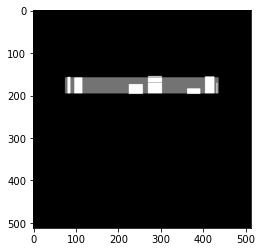